<a href="https://colab.research.google.com/github/mjgutierre/DataScience/blob/main/lab2_nltk_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad EAFIT Maria jose Gutierrez Estrada 2024-2

Se cargaron las librerias necesarias

- nltk para 'procesamiento natural del lenguaje'
- pandas para procesamiento de dataframes, muy usado en preparación de datos
- re - expresiones regulares
- numpy, codecs, etc - otras

In [1]:
## Configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip3 install nltk
!pip3 install pandas

import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt

In [13]:
!ls 'gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/'

48903-0.txt  58221-0.txt  pg45438.txt  pg47631.txt
57654-0.txt  pg2000.txt   pg47287.txt  pg62627.txt


In [14]:
# directorios (path) de entrada y salida:#
path_in="gdrive/MyDrive/st1800-242-Main/datasets/gutenberg-es/"
path_out="gdrive/MyDrive/st1800-242-Main/Out/"
filenametxt='pg2000.txt'
filenamecleantxt='pg2000_clean.txt'
filenamecsv='pg2000.csv'

In [15]:
# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
# ejemplo de como nltk tokeniza:
texto="texto libre que permite crear     hiso20091iras epor--4 no s#e preocupe \n hola mundo cruel"
tokens = nltk.word_tokenize(texto)
print(len(tokens))
print(tokens)

17
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor', '--', '4', 'no', 's', '#', 'e', 'preocupe', 'hola', 'mundo', 'cruel']


In [22]:
# note la estrategia de tokenizar con sentencias simples de python,
# ¿ cual le parece mejor?
# y note la diferencia entre .split() y .split(' ')
texto="texto libre que permite crear     hiso20091iras            epor--4 no s#e preocupe \n hola mundo cruel"
tokens = texto.split()#-> mejor estrategia
print(len(tokens))
print(tokens)
tokens = texto.split(' ')
print(len(tokens))
print(tokens)

13
['texto', 'libre', 'que', 'permite', 'crear', 'hiso20091iras', 'epor--4', 'no', 's#e', 'preocupe', 'hola', 'mundo', 'cruel']
29
['texto', 'libre', 'que', 'permite', 'crear', '', '', '', '', 'hiso20091iras', '', '', '', '', '', '', '', '', '', '', '', 'epor--4', 'no', 's#e', 'preocupe', '\n', 'hola', 'mundo', 'cruel']


In [23]:
# stopwords en nltk
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{"shan't", 'themselves', 'my', 'be', 'isn', "weren't", "needn't", 'theirs', 'those', 'more', 'that', 'whom', 'we', 'had', 'when', 'am', 's', "you're", 'over', 'then', 'aren', 'its', 'have', 'few', 'can', 'yourself', "shouldn't", 'during', 'y', 'yourselves', 'd', 'on', 'they', 'after', 'above', 'his', 'ours', 'each', 'all', 'with', "you've", "you'll", 'out', 'here', 'and', 'he', 'again', "doesn't", 'other', 'are', 'about', 'further', 'won', 'between', "wouldn't", 'itself', 'their', 'did', 'is', 'having', 'some', 'which', 'don', 'does', 'mightn', 'any', "it's", 'you', 'was', 'himself', 'mustn', 'just', 'down', 'if', 'where', 'hasn', 't', 'than', 'off', 'didn', 'at', 'wasn', "should've", 'while', 'being', "you'd", 'myself', 'her', "couldn't", 'from', 'your', 'why', 'this', 'these', 'through', 'him', 'of', "didn't", "mustn't", "wasn't", 'before', 'ain', 'ourselves', 'once', "mightn't", 'the', 'has', 'now', 'for', 're', 'own', 'there', "isn't", "that'll", 'been', 'nor', 'o', 'by', 'them

In [24]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en

x = len(voc_en.words())
print('tamaño del diccionario en inglés del nltk: ',x)

# verifica si una palabra pertenece al diccionario:
w = "house"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")

w = "pepito"
if (len(w) >1) and w.isalpha() and (w in voc_en.words()) and (w not in stop_words_nltk_en):
    print(w," true")
else:
    print(w," false")

tamaño del diccionario en inglés del nltk:  236736
house  true
pepito  false


In [27]:
# leer un archivo de ejemplo en .txt
input_file = open('gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/pg2000.txt', "r", encoding='iso-8859-1')
filedata = input_file.read()

numero de palabras finales =  22840
[('don', 2652), ('quijote', 2180), ('sancho', 2148), ('ms', 2044), ('si', 1966), ('dijo', 1808), ('ser', 1293), ('tan', 1243), ('as', 1075), ('seor', 1063), ('respondi', 1063), ('bien', 1050), ('haba', 1034), ('merced', 900), ('pues', 865), ('qu', 849), ('sino', 694), ('dos', 684), ('caballero', 661), ('decir', 578)]


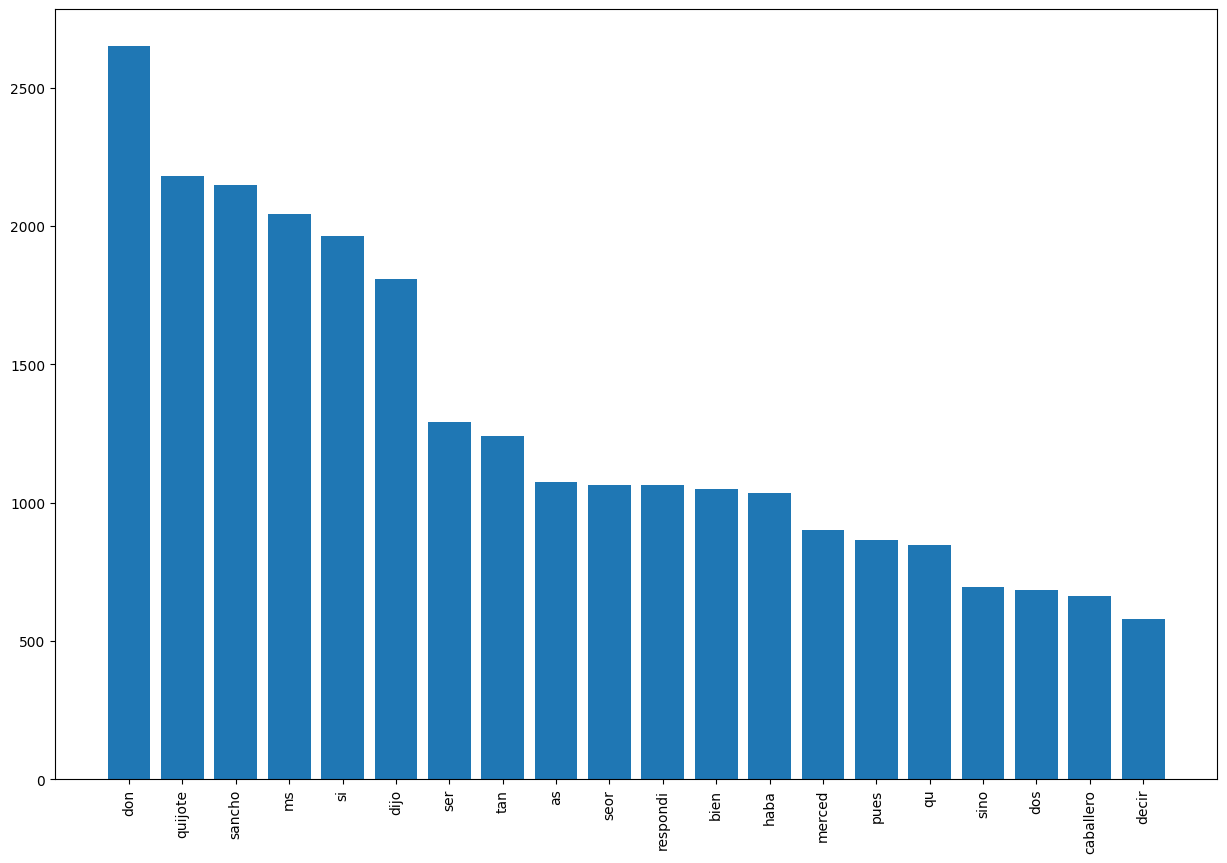

In [28]:
# opción 1:
# TOKENIZAR con .split(),
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  22837
[('don', 2652), ('quijote', 2180), ('sancho', 2148), ('ms', 2044), ('si', 1966), ('dijo', 1808), ('ser', 1293), ('l', 1283), ('tan', 1243), ('as', 1075), ('seor', 1063), ('respondi', 1063), ('bien', 1050), ('haba', 1034), ('merced', 900), ('pues', 865), ('qu', 849), ('s', 741), ('sino', 694), ('dos', 684)]


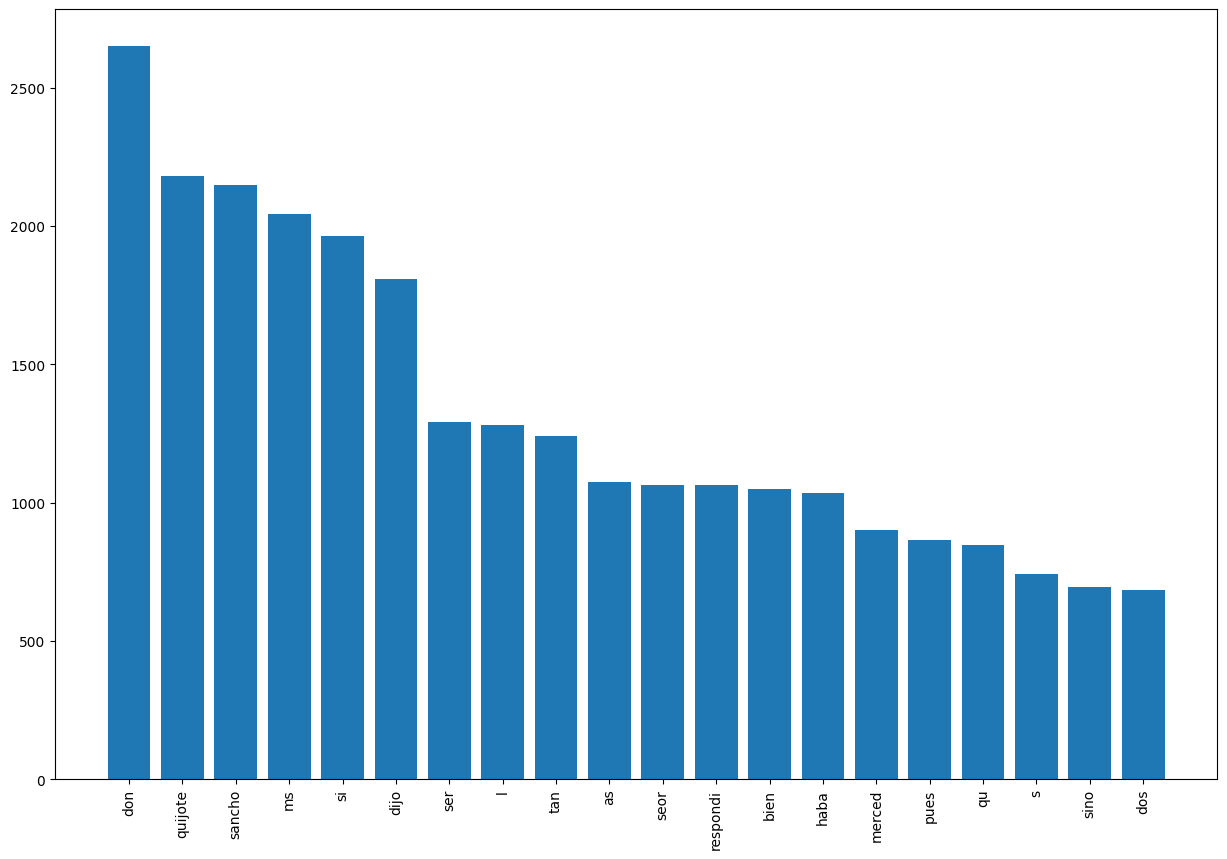

In [34]:
# opción 2:
# TOKENIZAR con nltk,
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

tokens = nltk.word_tokenize(filedata)
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  17401


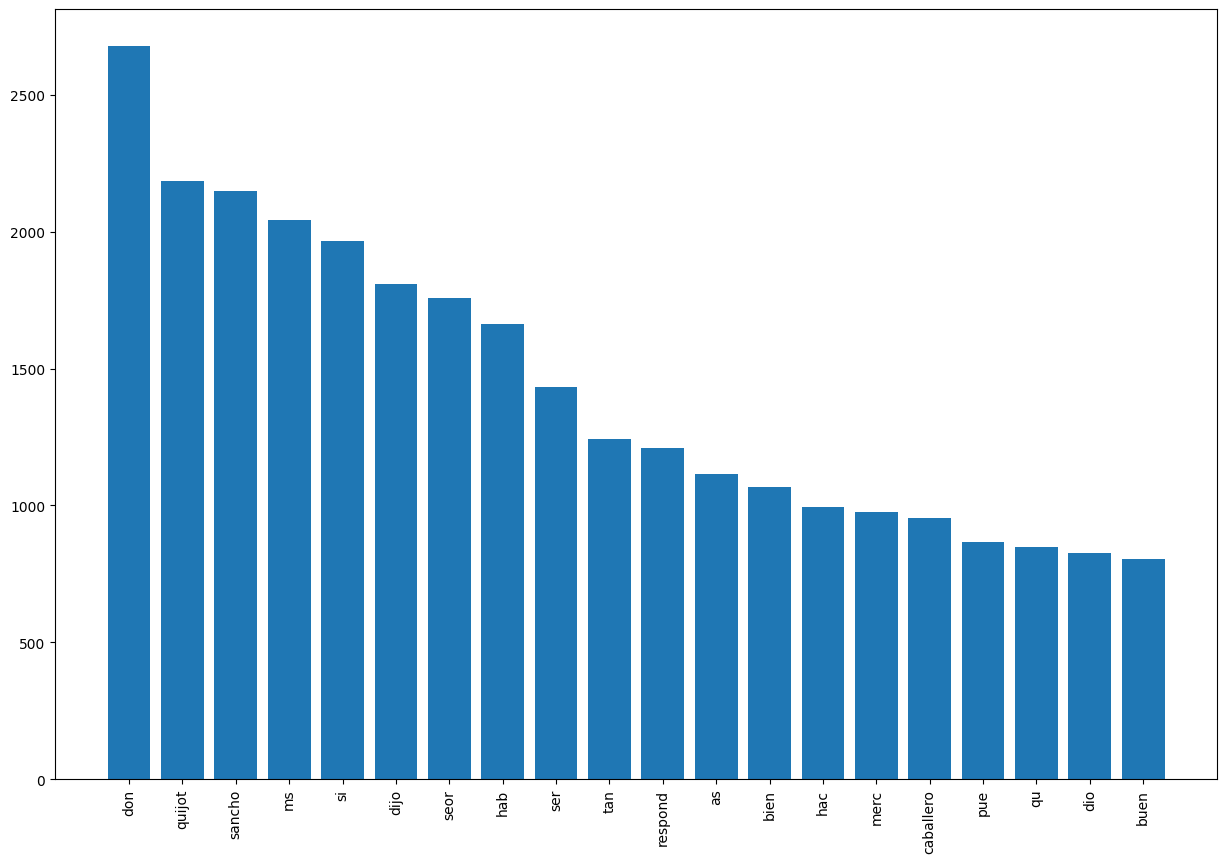

In [29]:
# Stemming con NLTK Lancaster

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
# probar cada una de las siguientes opciones: porter y lancaster.
#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

numero de palabras finales =  22595


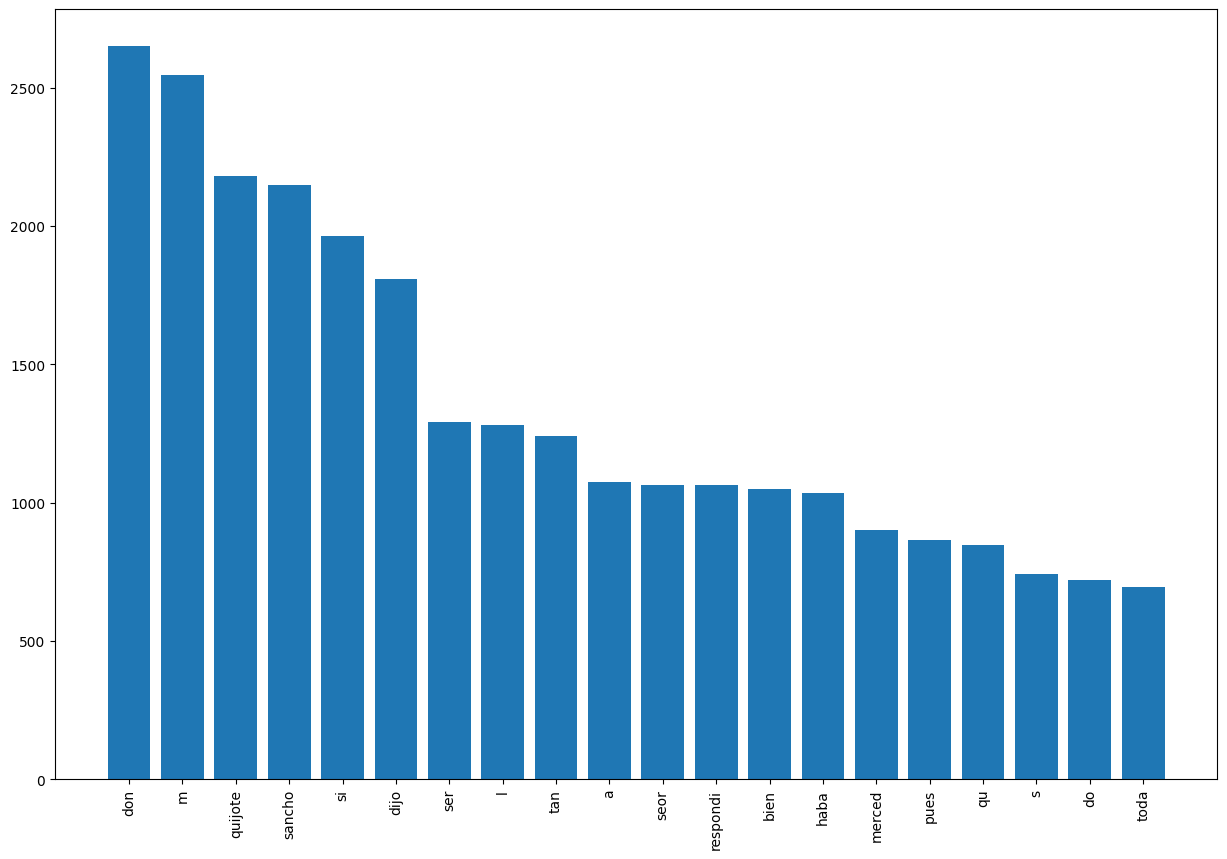

In [35]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones:
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

## Porter

numero de palabras finales =  14477
[('don', 2643), ('si', 1876), ('tan', 1219), ('ser', 997), ('sancho', 953), ('quijote', 907), ('bien', 890), ('sino', 687), ('merced', 678), ('dos', 641), ('aunque', 513), ('aquel', 480), ('hacer', 474), ('caballero', 463), ('pues', 461), ('decir', 460), ('buen', 439), ('dijo', 419), ('mal', 411), ('cosa', 382)]


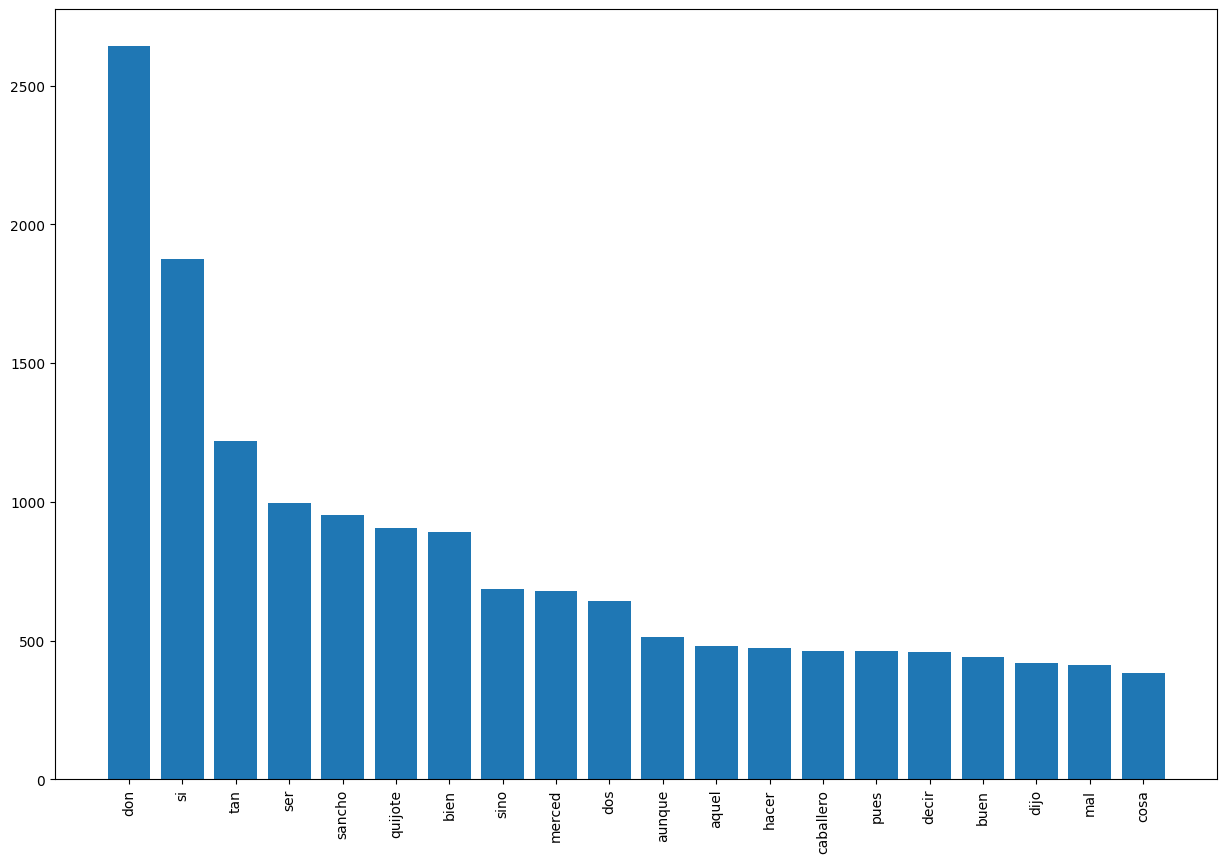

In [32]:
# opción 1:
# TOKENIZAR con .split(),
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
#tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens=[word for word in tokens if word.isalpha()] # con esta estrategia disminuye el numero de palabrasa finales de 22840 a 14477

tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()



numero de palabras finales =  12209


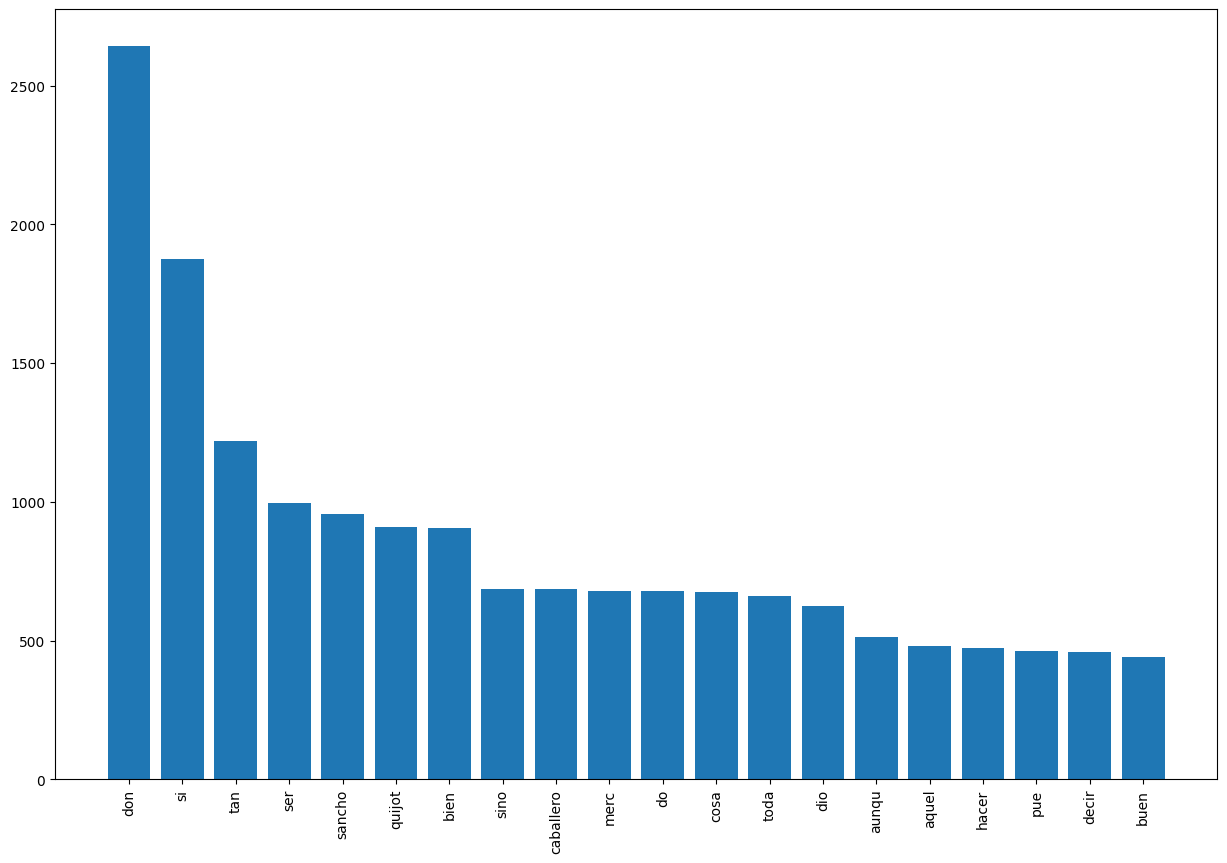

In [33]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
tokens = [porter.stem(w) for w in tokens]
#tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [36]:
# volver a leer el archivo ejemplo en .txt
input_file = open('gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/pg2000.txt', "r")
output_file_clean = open('gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/pg2000_clean.txt', "w")

In [37]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

for line in input_file:
    line_clean = ""
    tokens = nltk.word_tokenize(line)
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words_nltk]
    #tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens]

    #tokens = [porter.stem(w) for w in tokens]
    tokens = [lancaster.stem(w) for w in tokens]

    for w in tokens:
        line_clean=line_clean+w+" "

    if (line_clean!=""):
        line_clean=line_clean+"\n"
        output_file_clean.write(line_clean)
output_file_clean.close()

In [38]:
input_file_clean = open('gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/pg2000_clean.txt', "r", encoding='iso-8859-1')

numero de palabras finales =  17267


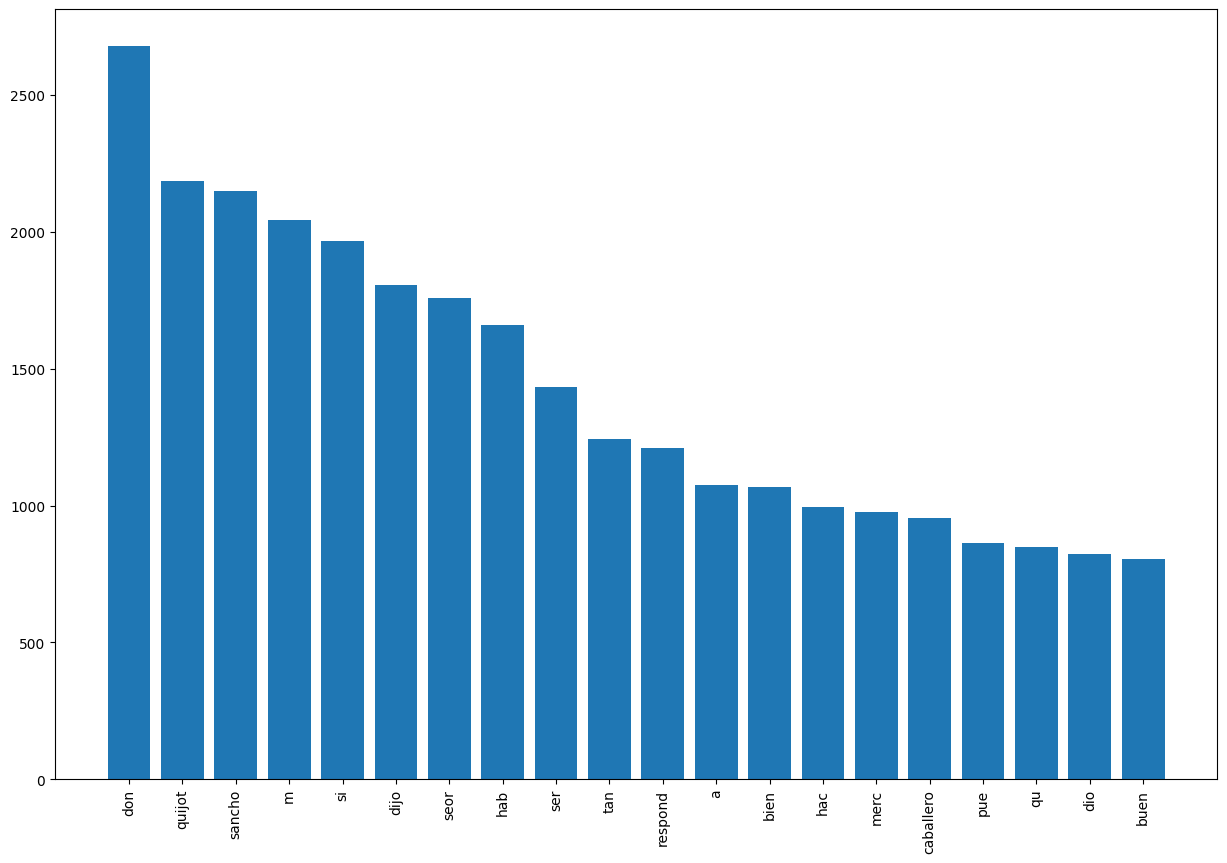

In [39]:
filedata = input_file_clean.read()
tokens = filedata.split()
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [41]:
word_freq = fdist.most_common(len(fdist))

In [47]:
import csv

with open('gdrive/MyDrive/st1800-242-main/datasets/gutenberg-es/pg2000.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["word", "frecuency"])
    writer.writerows(word_freq)

csvFile.close()

In [46]:
# extract top 30 words
top_words = word_freq[:20]
print(top_words)

[('don', 2680), ('quijot', 2186), ('sancho', 2150), ('m', 2044), ('si', 1966), ('dijo', 1808), ('seor', 1758), ('hab', 1662), ('ser', 1433), ('tan', 1243), ('respond', 1211), ('a', 1075), ('bien', 1068), ('hac', 994), ('merc', 976), ('caballero', 954), ('pue', 865), ('qu', 849), ('dio', 825), ('buen', 805)]


In [48]:
import pandas as pd
df = pd.DataFrame(top_words)
df.head()

,0,1
0,don,2680
1,quijot,2186
2,sancho,2150
3,m,2044
4,si,1966


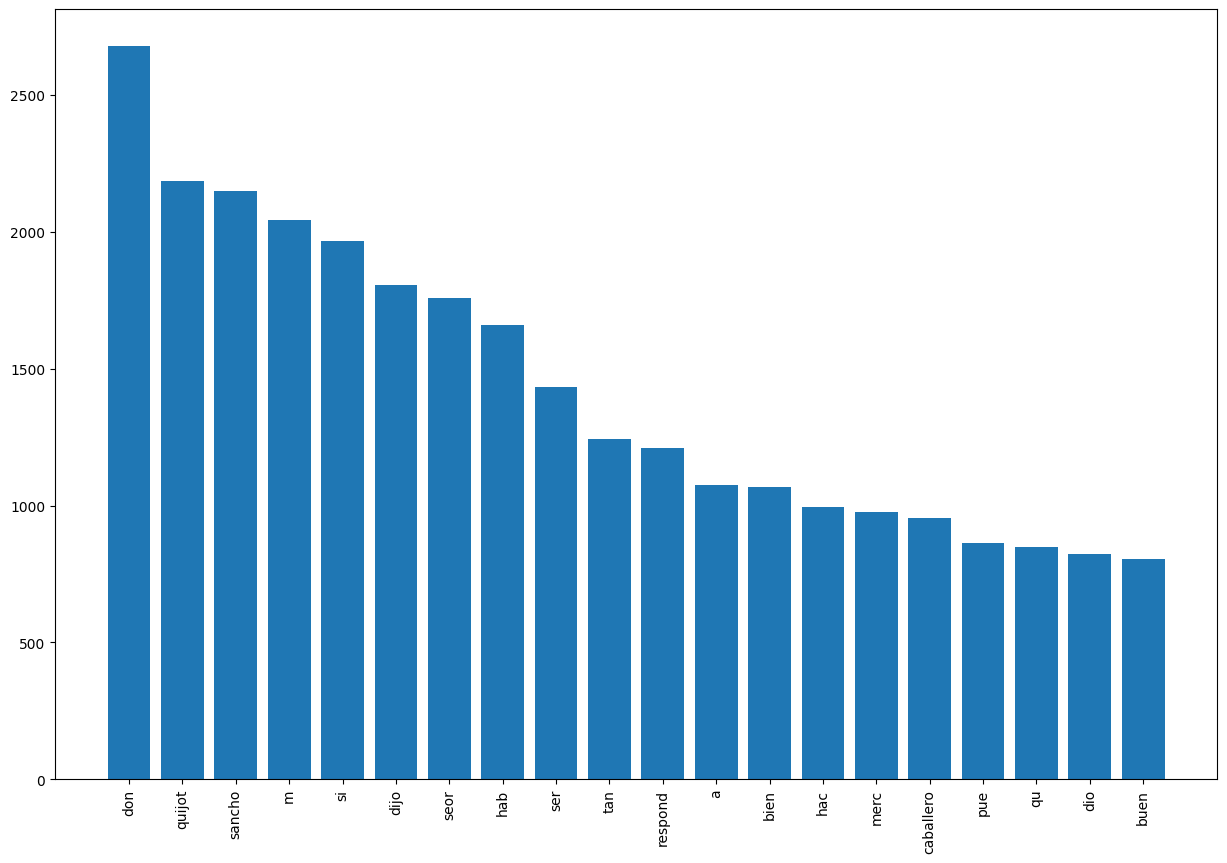

In [49]:
import matplotlib.pyplot as plt
x,y = zip(*top_words)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

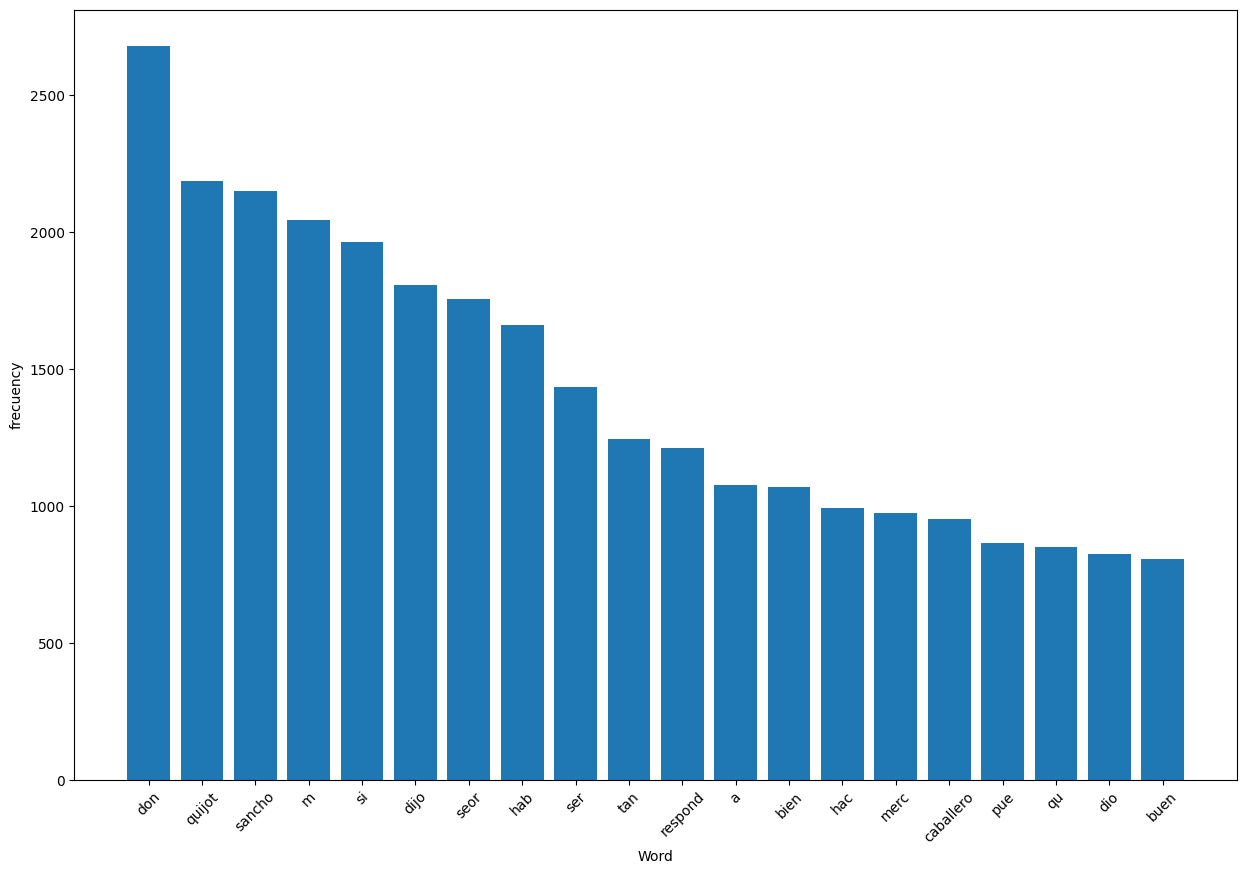

In [50]:
import matplotlib.pyplot as plt
df = pd.DataFrame(top_words)
plt.figure(figsize=(15,10))
plt.bar(df[0],df[1])
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("frecuency")
plt.show()